In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
col_width = 7.141
plt.style.use(['./figures.mplstyle'])

# Reading Data

In [9]:
minutes = [5]
devices = range(100, 12100, 100)
bitlistIntervals = [2000, 10000]
moves = [False]
uniforms = [True]
broadcastTypes = ['smart']
spacings = [2, 3, 5, 7, 10, 15]
rates = [30000, 60000, 120000]

data_summaries = {}
data_deliveries = {}
for minute in minutes:
    for device in devices:
        for bitlist in bitlistIntervals:
            for move in moves:
                for uniform in uniforms:
                    for broadcastType in broadcastTypes:
                        for space in spacings:
                            for rate in rates:
                                file_name = 'minutes_{minutes}_numDevices_{num_devices}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_broadcastType_{broadcastType}_uniformSpacing_{space}_sendRate_{rate}.csv'.format(
                                    space=space, 
                                    num_devices=device, 
                                    minutes=minute, 
                                    bitlist=bitlist, 
                                    move=move, 
                                    uniform=uniform, 
                                    broadcastType=broadcastType,
                                    rate=rate)
                                try:
                                    data_summaries[(minute, device, bitlist, move, uniform, broadcastType, space, rate)] = pd.read_csv('../python/processing/summaries/' + file_name)
                                    data_deliveries[(minute, device, bitlist, move, uniform, broadcastType, space, rate)] = pd.read_csv('../python/processing/delivery/' + file_name)
                                except:
                                    # no data for this combo
                                      continue
                                

# Plot effects of Message Send rate on Delivery

In [10]:
def get_cdf(df, col):
    sorted_data = np.sort(df[col])
    sorted_data_cdf = np.arange(len(sorted_data))/float(len(sorted_data)) * 100
    
    return sorted_data, sorted_data_cdf

def delivery_cdf(data, params, threshold):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('seconds')
    ax.set_ylabel('% Data')
    ax.set_title('1 min - {space} ft Delivery CDF'.format(space=params['space']))
    
    for device in params['devices']:
        df = data[(params['minute'], 
                   device, 
                   params['bitlist'], 
                   params['move'], 
                   params['uniform'], 
                   params['broadcastType'],
                   params['space'], 
                   params['rate'])]
        delivery_times = df[df['threshold'] == threshold]
        x, y = get_cdf(delivery_times, 'seconds')
        ax.plot(x, y, label='{device} devices'.format(device=device))

    ax.legend()
    
    name = 'delivery_minutes_{minutes}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_uniformSpacing_{space}_sendRate_{rate}.pdf'.format(
                                space=params['space'],  
                                minutes=params['minute'], 
                                bitlist=params['bitlist'], 
                                move=params['move'], 
                                uniform=params['uniform'], 
                                rate=params['rate'])
    
    plt.savefig('./Figures/delivery/' + name, format='pdf')
    plt.show()


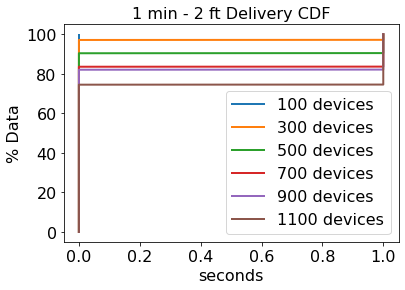

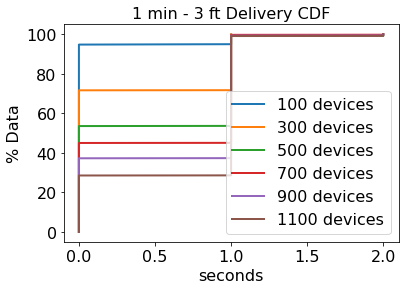

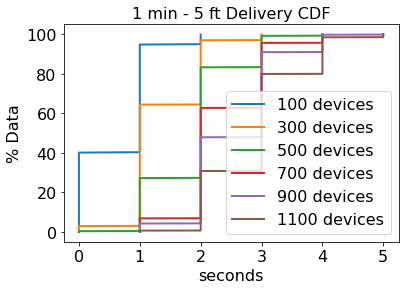

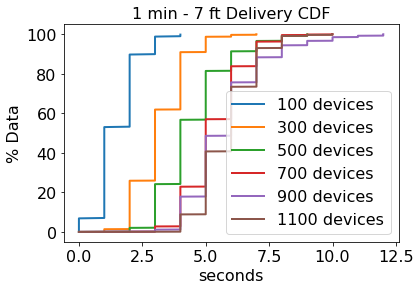

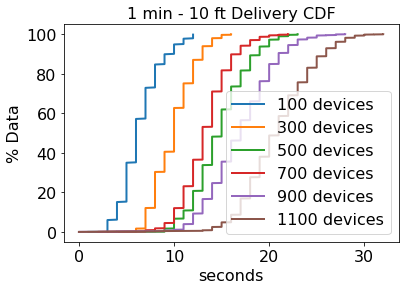

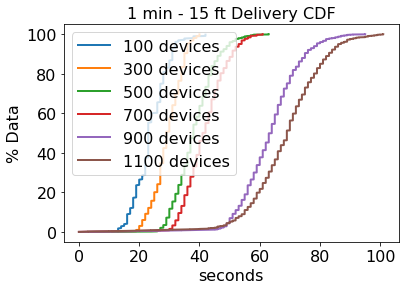

In [11]:
space_device_mappings = {2: range(100, 1200, 200),
                         3: range(100, 1200, 200), 
                         5: range(100, 1200, 200),
                         7: range(100, 1200, 200),
                         10: range(100, 1200, 200),
                         15: range(100, 1200, 200)}

for space in spacings:
    params = {'minute': 5, 
              'bitlist': 10000, 
              'move': False,
              'uniform': True,
              'broadcastType': 'smart',
              'rate': 60000,
              'space': space,
              'devices': space_device_mappings[space]}

    delivery_cdf(data_deliveries, params, 100)

These look very similar to the 30 second versions. This makes sense because the sim doesn't have queues that build up so more traffic doesn't cause drops and longer message delivery times. Delivery time is a function of graph diameter in this simulation.

# Plot effects of bitlist size on Bandwidth

In [15]:
def get_cdf(df, col):
    sorted_data = np.sort(df[col])
    sorted_data_cdf = np.arange(len(sorted_data))/float(len(sorted_data)) * 100
    
    return sorted_data, sorted_data_cdf

def bandwidth_cdf(data, params):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Mb/s')
    ax.set_ylabel('% Data')
    ax.set_title('Bandwidth CDF')
    
    for device in params['devices']:
        xs, ys = get_cdf(data[(params['minute'], 
                             device, 
                             params['bitlist'], 
                             params['move'], 
                             params['uniform'], 
                             params['broadcastType'],
                             params['space'], 
                             params['rate'])], 
                       'MB')
        # convert to Mb/s
        xs = [x * 8 for x in xs]
        label = '{device} Devices'.format(device=device)
        ax.plot(xs, ys, label=label)

    # add vertical line at 2 Mb/s
    plt.axvline(x = 2, color = 'black', linestyle='--')
    
    ax.legend()
    
    name = 'bandwidth_minutes_{minutes}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_uniformSpacing_{space}_sendRate_{rate}.pdf'.format( 
                space=params['space'],                        
                minutes=params['minute'], 
                bitlist=params['bitlist'], 
                move=params['move'], 
                uniform=params['uniform'], 
                rate=params['rate'])
    
#     plt.savefig('./Figures/bandwidths/' + name, format='pdf')
    
    plt.show()

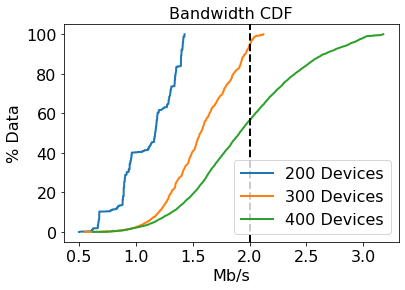

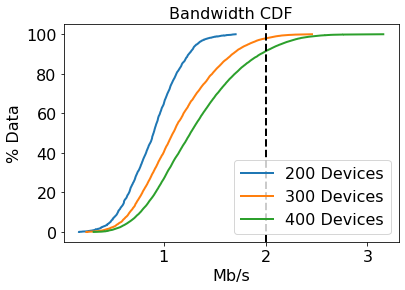

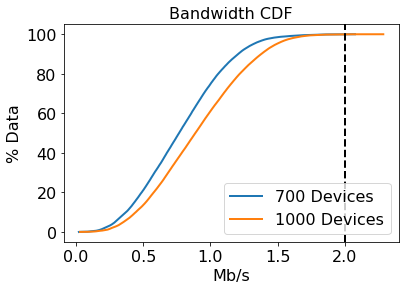

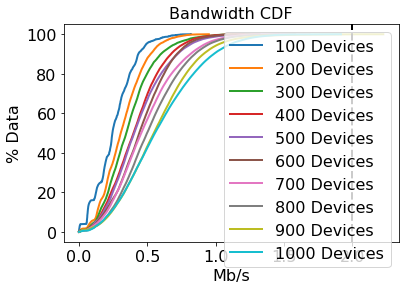

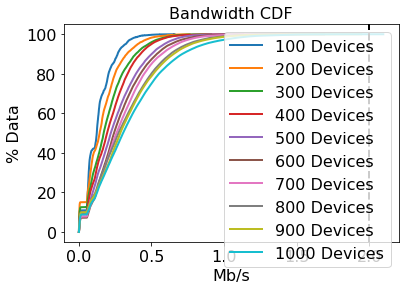

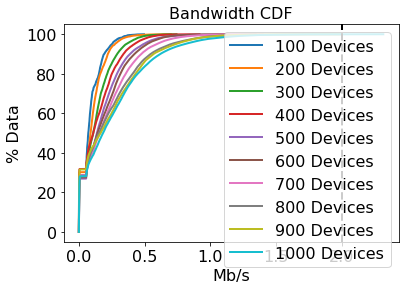

In [16]:
bandwidth_cdf(data_summaries, {'space': 2, 
                     'minute': 5, 
                     'bitlist': 10000, 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 60000,
                     'devices': [200, 300, 400]})

bandwidth_cdf(data_summaries, {'space': 3, 
                     'minute': 5, 
                     'bitlist': 10000, 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 60000,
                     'devices': [200, 300, 400]})

bandwidth_cdf(data_summaries, {'space': 5, 
                     'minute': 5, 
                     'bitlist': 10000, 
                     'move': False, 
                     'uniform': True,
                     'broadcastType': 'smart',
                     'rate': 60000,
                     'devices': [700, 1000]})

bandwidth_cdf(data_summaries, {'space': 7, 
                     'minute': 5, 
                     'bitlist': 10000, 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 60000,
                     'devices': range(100, 1100, 100)})

bandwidth_cdf(data_summaries, {'space': 10, 
                     'minute': 5, 
                     'bitlist': 10000, 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 60000,
                     'devices': range(100, 1100, 100)})

bandwidth_cdf(data_summaries, {'space': 15, 
                     'minute': 5, 
                     'bitlist': 10000, 
                     'move': False, 
                     'uniform': True, 
                     'broadcastType': 'smart',
                     'rate': 60000,
                     'devices': range(100, 1100, 100)})

# Capacity

In [27]:
def avg_device_quantile(df, q):
    num_devices = len(df['Device'].unique())
    # find qth quantile for each device
    quantiles = [total_quantile(df[df['Device'] == dev_id], q) for dev_id in range(num_devices)]
    return sum(quantiles) / num_devices

def med_device_quantile(df, q):
    num_devices = len(df['Device'].unique())
    # find qth quantile for each device
    quantiles = [total_quantile(df[df['Device'] == dev_id], q) for dev_id in range(num_devices)]
    return statistics.median(quantiles)

def total_quantile(df, q):
    return df['MB'].quantile(q)

def capacity_line(data, params, q, measure):
    bws = {}
    
    # get all bandwidths
    for space, devices in params['spacings'].items():
        for device in devices:
            df = data[(params['minute'], device, params['bitlist'], params['move'], params['uniform'], params['broadcastType'], space, params['rate'])]
            bws[(device, space)] = measure(df, q)
           
    # find capacities (largest bw < 0.25 that we see)
    capacities = {}
    for space in params['spacings']:
        capacities[space] = 0
        
    for space, devices in params['spacings'].items():
        for device in devices:
            if (capacities[space] < device) and (bws[(device, space)] <= 0.25):
                capacities[space] = device
                  
    display(capacities)
    xs, ys = zip(*capacities.items())
    
    return xs, ys

def capacities(data, params, qs, measure):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Spacing (ft. apart)')
    ax.set_ylabel('Number of Devices')
#     ax.set_title('Capacities')
    
    for q in qs:
        xs, ys = capacity_line(data, params, q, measure)
        ax.plot(xs, ys, marker='o', label='{percentile:0.0f}th percentile'.format(percentile=q*100))
    
    plt.legend()
    
    name = 'capacity_minutes_{minutes}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_broadcastType_{broadcastType}_sendRate_{rate}.pdf'.format( 
                                minutes=params['minute'], 
                                bitlist=params['bitlist'], 
                                move=params['move'], 
                                uniform=params['uniform'], 
                                broadcastType=params['broadcastType'],
                                rate=params['rate'])
    
    plt.savefig('./Figures/capacity/' + name, bbox_inches = 'tight',
    pad_inches = 0.1, format='pdf')
    
    plt.show()


{2: 300, 3: 400, 5: 2900, 7: 4400, 10: 5300, 15: 5900}

{2: 300, 3: 400, 5: 2600, 7: 3600, 10: 4200, 15: 4600}

{2: 200, 3: 300, 5: 2100, 7: 2800, 10: 3300, 15: 3200}

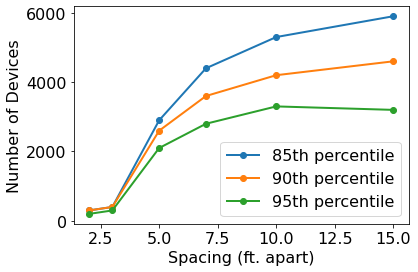

In [28]:
space_device_mappings = {2: range(100, 1200, 100), # complete (did not step by 10s)
                         3: range(100, 1200, 100), # complete (did not step by 10s)
                         5: list(range(100, 2500, 100)) + [2500, 2600, 2700, 2900, 3000, 3100], # complete (did not step by 10s)
                         7: list(range(100, 3100, 100)) + [3100, 3300, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500], # complete (did not step by 10s)
                         10: list(range(100, 5600, 100)), # complete (did not step by 10s)
                         15: list(range(100, 4100, 100)) + list(range(4500, 5100, 100)) + list(range(5500, 6100, 100))} # complete (did not step by 10s)

params = {'minute': 5, 
          'bitlist': 10000, 
          'move': False,
          'uniform': True, 
          'rate': 60000,
          'broadcastType': 'smart',
          'spacings': space_device_mappings}


capacities(data_summaries, params, [0.85, 0.9, 0.95], total_quantile)

In [20]:
data_summaries[(5, 3000, 10000, False, True, 'smart', 10, 60000)]['MB'].quantile(0.95)

0.2356333999999998

In [21]:
data_summaries[(5, 3400, 10000, False, True, 'smart', 15, 60000)]['MB'].quantile(0.95)
data_summaries[(5, 3800, 10000, False, True, 'smart', 10, 60000)]['MB'].quantile(0.9)

0.23399649999999994

# 2 min per message

{2: 300, 3: 500, 5: 3500, 7: 5400, 10: 7900, 15: 11900}

{2: 200, 3: 400, 5: 2900, 7: 4300, 10: 5800, 15: 9200}

{2: 200, 3: 400, 5: 2300, 7: 3300, 10: 3800, 15: 5900}

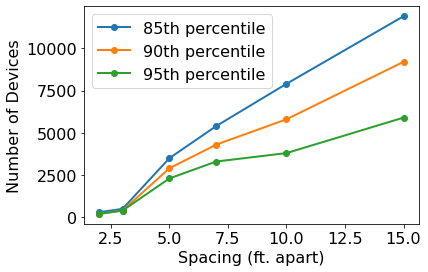

In [29]:
space_device_mappings = {2: range(100, 1100, 100), # complete (did not step by 10s)
                         3: range(100, 1100, 100), # complete (did not step by 10s)
                         5: range(2000, 4000, 100), # complete (did not step by 10s)
                         7: list(range(3000, 3600, 100)) + list(range(4000, 5600, 100)), # complete (did not step by 10s)
                         10: [3500, 3600, 3700, 3800, 3900, 4000, 4500, 5000, 5100, 5200, 5300, 5500, 5600, 5700, 5800, 5900, 6000, 6500, 6600, 6700, 6800, 6900, 7000, 7500, 7600, 7700, 7800, 7900, 8000, 8500, 9000, 9500, 10000], # complete (did not step by 10s)
                         15: [5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9100, 9200, 9300, 9400, 9500, 10000, 10500, 11000, 11500, 11600, 11700, 11800, 11900, 12000]} # complete (did not step by 10s)

params = {'minute': 5, 
          'bitlist': 10000, 
          'move': False,
          'uniform': True, 
          'rate': 120000,
          'broadcastType': 'smart',
          'spacings': space_device_mappings}

capacities(data_summaries, params, [0.85, 0.9, 0.95], total_quantile)

In [ ]:
# for key in data_summaries.keys():
#     print(key)

# better bitlist size

{2: 0, 3: 0, 5: 0, 7: 0, 10: 1600, 15: 2700}

{2: 0, 3: 0, 5: 0, 7: 0, 10: 1600, 15: 2700}

{2: 0, 3: 0, 5: 0, 7: 0, 10: 0, 15: 2700}

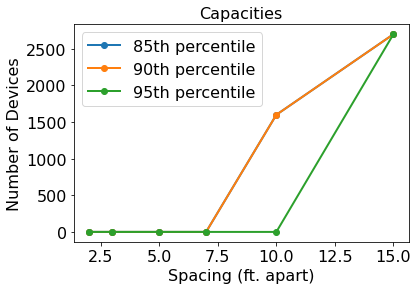

In [23]:
space_device_mappings = {2: [200, 300, 400], # 
                         3: [200, 300, 400], # 
                         5: [900, 1300, 1400, 1500], # 
                         7: [1500, 1900, 2100, 2200], # 
                         10: [1600, 2200, 2700, 2800], # 
                         15: [1500, 2100, 2600, 2700]} # 

params = {'minute': 5, 
          'bitlist': 2000, 
          'move': False,
          'uniform': True,
          'broadcastType': 'smart',
          'rate': 30000,
          'spacings': space_device_mappings}


capacities(data_summaries, params, [0.85, 0.9, 0.95], total_quantile)